# Pymaceuticals Inc.
---

### Purpose of Analysis

This analysis represents the data of 249 mice who were identified with SCC tumors and who received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. 
The purpose of this analys is to summarize the study results which compared the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

### Results of Analysis

The data showsw that two most effective drugs are Ramicane and Capomulin. These 2 drug regimenes were tested on most numbers of mice. 
A summary statistics shows that the treatment regime with Ramicane leads to slightly lower Tumor Volume (mm3). As a result, we can say that Ramicane shows a little better results than Capomulin. Analyzing Capomulin itself- we can indicate that there is a strong correlation between mouse weight and average tumor volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
print(mouse_metadata.columns)
print(study_results.columns)
merged = pd.merge(mouse_metadata, study_results, how="right", on='Mouse ID')

# Display the data table for preview
merged.head()



Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


In [3]:
# Checking the number of mice.
mice_count = mouse_metadata['Mouse ID'].count()
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# duplicate_mice = merged[merged.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = merged[merged.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged[merged['Mouse ID'] == 'g989']

duplicate_mouse_data


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   
1195     g989     Propriva  Female          21          26         25   
1380     g989     Propriva  Female          21          26         30   
1592     g989     Propriva  Female          21          26         35   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            47.570392                 0  
620            51.745156                 0  
681            49.880528                 0  
815            51.325852                 1  
869            53.442020                 0  
950            55.326122                 1  
1111           54.657650                 1  
1195           56.045564                 1  
1380           59.082294                 1  
1592           62.570880                 2

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged[merged['Mouse ID'] != 'g989']
cleaned_data.head()


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned = cleaned_data['Mouse ID'].nunique()
mice_count_cleaned

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Tumor_volume_mean = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Tumor_volume_mean 
Tumor_volume_median = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Tumor_volume_median
Tumor_volume_variance = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
Tumor_volume_variance
Tumor_volume_Std_Dev = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
Tumor_volume_Std_Dev

# Calculate the number of samples in each group
sample_sizes = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()

# Calculate the SEM using the formula: SEM = standard deviation / sqrt(sample size)
SEM = Tumor_volume_Std_Dev / np.sqrt(sample_sizes)
SEM

# Assemble the resulting series into a single summary DataFrame.

Drug_Regimen_df = pd.DataFrame({'Mean Tumor Volume': Tumor_volume_mean, 
                                'Median Tumor Volume': Tumor_volume_median, 
                                'Tumor Volume Variance': Tumor_volume_variance, 
                                'Tumor Volume Std. Dev.': Tumor_volume_Std_Dev,
                                'Tumor Volume Std. Err.': SEM})
Drug_Regimen_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_table = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean","median","var","std","sem"]})
summary_table
# Using the aggregation method, produce the same summary statistics in a single line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

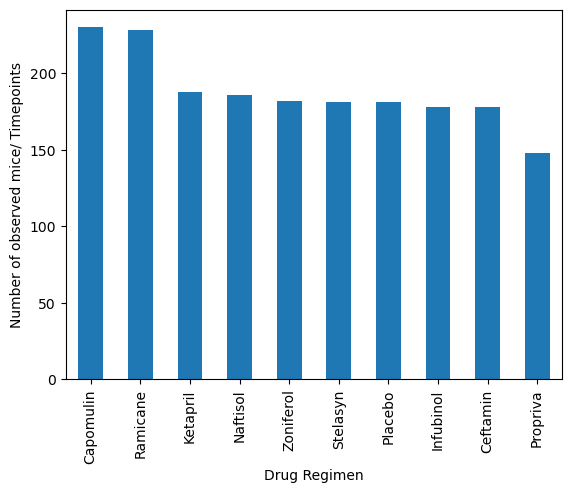

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = cleaned_data['Drug Regimen'].value_counts()
count.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.xticks(rotation= 90)
plt.ylabel('Number of observed mice/ Timepoints')
plt.show()


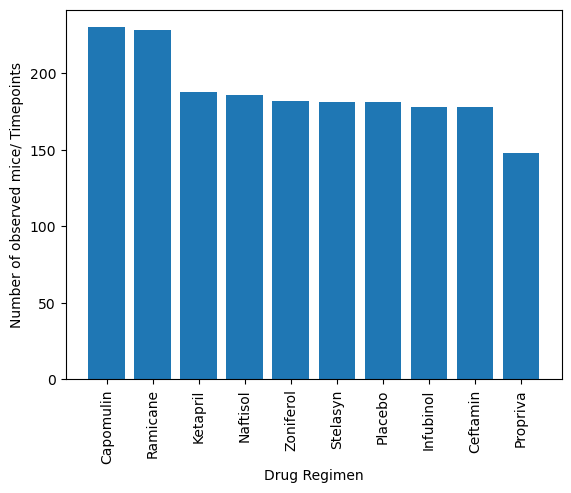

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count = cleaned_data['Drug Regimen'].value_counts()
plt.bar(count.index.values,count.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation= 90)
plt.ylabel('Number of observed mice/ Timepoints')
plt.show()

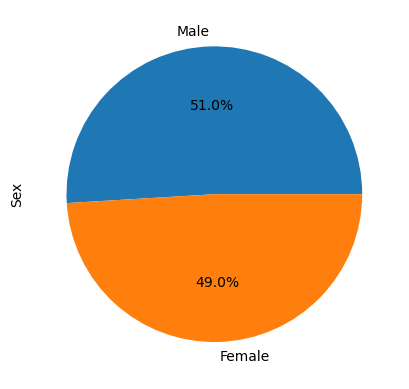

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = cleaned_data['Sex'].value_counts()
count.plot(kind='pie', autopct= '%1.1f%%')
plt.ylabel('Sex')
plt.show()


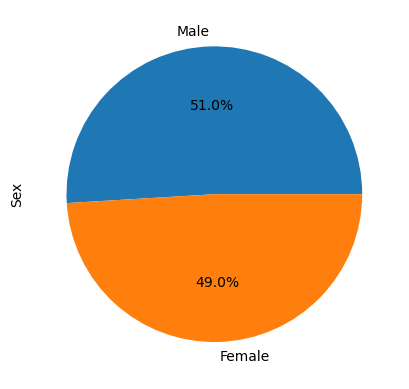

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = cleaned_data['Sex'].value_counts()
plt.pie(count.values, labels= count.index.values, autopct= '%1.1f%%')
# plt.bar(count.index.values,count.values)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_max_volume = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max()
tumor_max_volume = tumor_max_volume.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data= tumor_max_volume.merge(cleaned_data, on= ['Mouse ID', 'Timepoint'], how= 'left')
merged_data

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
Tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Treatment_list: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # add subset 
    Tumor_volume_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles= final_tumor_volume.quantile([0.25, 0.5, 0.75])
    low_quartile= quartiles[0.25]
    upper_quartile= quartiles[0.75]
    iqr= upper_quartile - low_quartile
    low_bound= low_quartile - (1.5*iqr)
    upper_bound= upper_quartile + (1.5*iqr)
    outliers= final_tumor_volume.loc[(final_tumor_volume<low_bound) | (final_tumor_volume>upper_bound)]
    print(f'{drug} outliers: {outliers}')

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


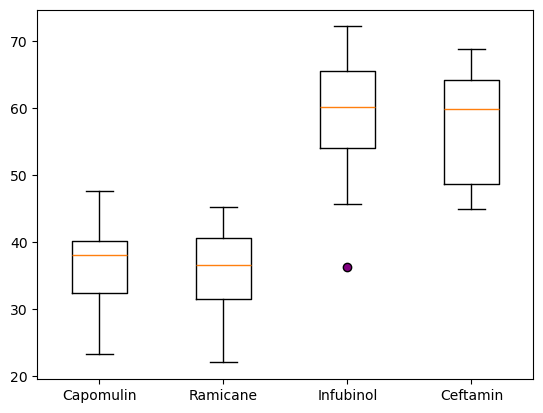

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
out= dict(markerfacecolor= 'purple', markersize= 6 )
plt.boxplot(Tumor_volume_list, labels= Treatment_list, flierprops= out)
plt.show()

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [18]:
mouse_ids_list = merged_data['Mouse ID'].unique()
print(mouse_ids_list)

['a203' 'a251' 'a262' 'a275' 'a366' 'a401' 'a411' 'a444' 'a457' 'a492'
 'a520' 'a577' 'a644' 'a685' 'a699' 'a788' 'a818' 'a897' 'a963' 'b128'
 'b313' 'b447' 'b487' 'b559' 'b742' 'b759' 'b879' 'c139' 'c264' 'c282'
 'c302' 'c326' 'c402' 'c458' 'c559' 'c580' 'c757' 'c758' 'c766' 'c819'
 'c832' 'c895' 'c927' 'd133' 'd164' 'd251' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'e662' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545'
 'f932' 'f966' 'f993' 'g107' 'g288' 'g296' 'g316' 'g497' 'g558' 'g570'
 'g791' 'g867' 'h246' 'h333' 'h428' 'h531' 'i177' 'i334' 'i386' 'i477'
 'i557' 'i635' 'i669' 'i738' 'i901' 'j119' 'j235' 'j246' 'j296' 'j365'
 'j755' 'j913' 'j984' 'j989' 'k210' 'k382' 'k403' 'k483' 'k510' 'k603'
 'k754' 'k804' 'k862' 'k894' 'l215' 'l264' 'l471' 'l490' 'l509' 'l558'
 'l661' 'l700' 'l725' 'l733' 'l872' 'l897' 'm133' 'm269' 'm331' 'm546'
 'm550' 'm601' 'm650' 'm756' 'm957' 'n304' 'n364' 'n482' 'n630' 'n671'
 'n678' 'n763' 'n923' 'n967' 'o287' 'o302' 'o331' 'o523' 'o562' 'o725'
 'o795

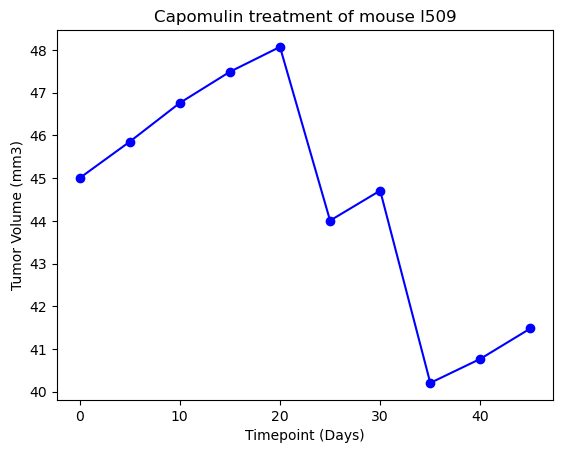

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509'
drug_regimen = 'Capomulin'

mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == drug_regimen)]
mouse_data

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label='Tumor Volume vs. Time Point')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



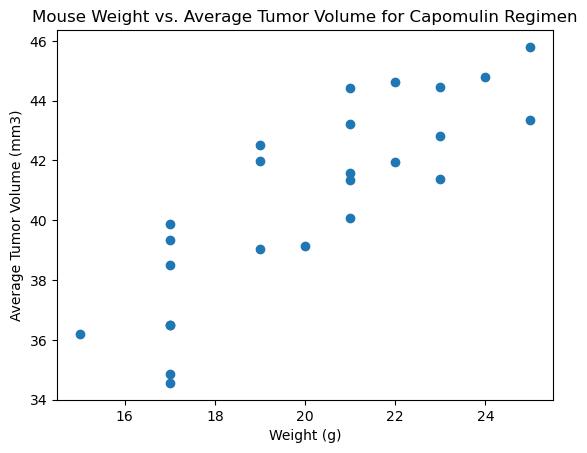

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8419363424694719


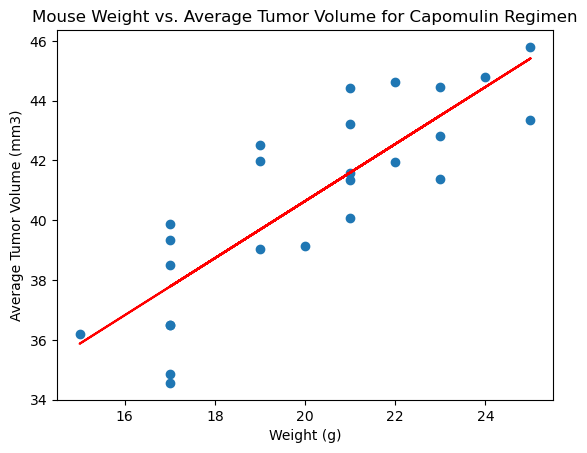

In [35]:
# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {correlation[0]}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regress_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()